In [1]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
csv = "https://www.dropbox.com/s/oqoyy9p849ewzt2/linear.csv?dl=1"
data = np.genfromtxt(csv,delimiter=",")
X = data[:,1:]
Y = data[:,0]


#create matrix and  vector
print("qns 1a")


vX = X[:10,:]

print("vx: ",vX.shape)

vY = Y[:10]
print("vy: ",vY.shape)



tX = X[10:,:]
print("tx: ",tX.shape)


tY = Y[10:]
print("ty: ",tY.shape)



qns 1a
vx:  (10, 4)
vy:  (10,)
tx:  (40, 4)
ty:  (40,)


In [38]:


import theano
import theano.tensor as T
d = tX.shape[1] # dimension of feature vectors
n = tX.shape[0] # number of training samples
learn_rate = 0.5 # learning rate for gradient descent


x = T.matrix(name="x") # feature matrix
y = T.vector(name="y") # response vector
w = theano.shared(np.zeros((d,1)),name="w")


print("\nQuestion 1b")

lambdaaa = 0.15
emprisk = T.sum((T.dot(x,w).T-y)**2)/2/n #empirical risk
regrisk = T.sum(w[:-1]*w[:-1])*(lambdaaa/2) #regularization risk. 

total_risk = regrisk + emprisk
grad_risk = T.grad(total_risk,wrt=w) #gradient of the risk
train_model = theano.function(inputs=[],
                            outputs=total_risk,
                            updates=[(w,w-learn_rate*grad_risk)],
                            givens={x:tX, y:tY})

n_steps=50
for i in range(n_steps):
    train_model()
print(np.ravel(w.get_value()))
print("Bias term is irrelevant")




WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.



Question 1b


[-0.53590673  1.20293332  0.04334569 -1.85492455]
Bias term is irrelevant


In [39]:
from scipy.optimize import fmin_l_bfgs_b as minimize
import numpy as np
def costgrad(w,x,y):
    n=x.shape[0]
    costgradlambdaaa = 0.15
    emp_risk = np.sum((np.dot(x,w).flatten()-y)**2)/2/n #empirical risk
    reg_risk = np.sum(w[:-1]*w[:-1])*(costgradlambdaaa/2) #regularization risk. 
    total_cost=emp_risk+reg_risk
    grad_cost=(costgradlambdaaa*np.append(w[:-1],0))+((np.transpose(x).dot(x)).dot(w)/n)-((np.transpose(x).dot(y))/n)
    return total_cost,grad_cost
w=np.zeros((d,1))
optx,cost,messages=minimize(costgrad,w,args=[tX,tY])



print("qns 1c ")
print(optx)



qns 1c 
[-0.53591305  1.20293347  0.04332715 -1.85492236]


In [44]:

print("1d")

import numpy as np
def ridge_regression(tX,tY,l):
    
    #tX shape is (40,4)
    #therefore n is 40
    #no of features is 4
    n,d=tX.shape
    #print(tX.shape)
    #print(n)
    Identitymatrix=np.eye(d)
    
    #print(eye_mat)
    Identitymatrix[-1,-1]=0 # set last feature to be 0 since its bias
    #firstpart has to be (4,4) for addition since 2nd part is (4,4)   
    firstpart=n*l*Identitymatrix
    secondpart=np.dot(tX.T,tX)
    firstterm=np.linalg.inv(firstpart+secondpart)
    secondterm=np.dot(tX.T,tY)
    return np.dot(firstterm,secondterm)



print(ridge_regression(tX,tY,0.15))




1d
[-0.53590673  1.20293332  0.04334568 -1.85492455]


qns 1e
the lambda that minimizes the validation loss is 10^-1


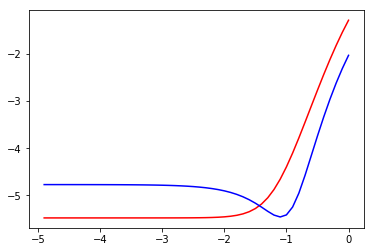

In [45]:
print("qns 1e")
tn=tX.shape[0]
vn=vX.shape[0]
tloss=[]
vloss=[]
index=-np.arange(0,5,0.1)
for i in index:
    w=ridge_regression(tX,tY,10**i)
    tloss=tloss+[np.sum((np.dot(tX,w)-tY)**2)/tn/2]
    vloss=vloss+[np.sum((np.dot(vX,w)-vY)**2)/vn/2]
import matplotlib.pyplot as plt
plt.plot(index,np.log(tloss),'r')
plt.plot(index,np.log(vloss),'b')



print("the lambda that minimizes the validation loss is 10^-1")




qns 2a


686 1030 3
[[0.3254902  0.36862746 0.45490196]
 [0.38431373 0.42745098 0.5137255 ]
 [0.4117647  0.45882353 0.56078434]
 ...
 [0.23137255 0.25882354 0.33333334]
 [0.22745098 0.25490198 0.32941177]
 [0.22352941 0.2509804  0.3254902 ]]


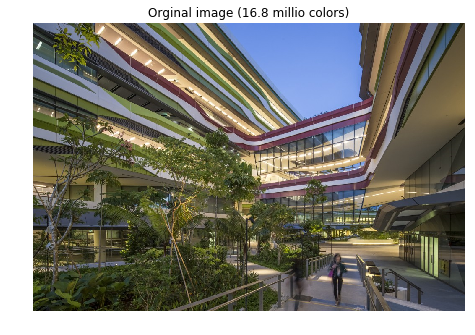

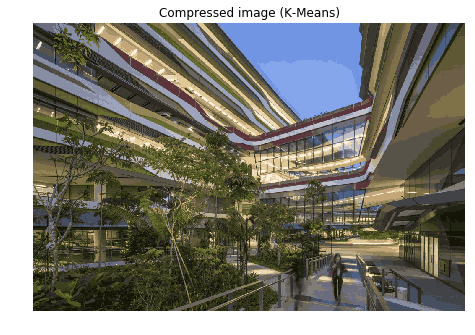

In [4]:
%matplotlib inline
import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
print("qns 2a")
n_colors = 32
pic = 'https://www.dropbox.com/s/bmwwfct2qxjfje4/sutd.png?dl=1'
img = mpimg.imread(pic)
img = img[:,:,:3]
w, h, d = tuple(img.shape)
print(w,h,d)
image_array = np.reshape(img, (w * h, d))
print(image_array)

def recreate_image(palette, labels, w, h):
    d = palette.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = palette[labels[label_idx]]
            label_idx += 1
    return image


plt.figure(1)
plt.clf()
ax=plt.axes([0,0,1,1])
plt.axis("off")
plt.title("Orginal image (16.8 millio colors)")
plt.imshow(img)



something=image_array[rng.permutation(w*h)[:1000]]
model=KMeans(n_clusters=32).fit(something)
kmeans_labels=model.predict(image_array)
kmeans_palette=model.cluster_centers_

plt.figure(2)
plt.clf()
ax=plt.axes([0,0,1,1])
plt.axis("off")
plt.title("Compressed image (K-Means)")
plt.imshow(recreate_image(kmeans_palette,kmeans_labels,w,h))




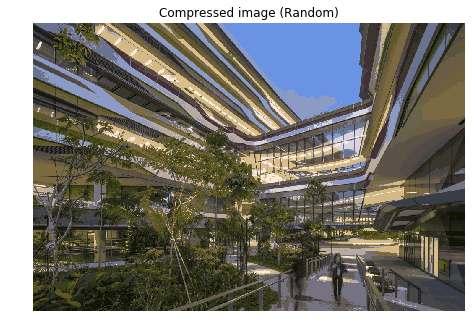

In [6]:

print("qns 2b")
from sklearn.metrics import pairwise_distances_argmin

random_palette=image_array[rng.permutation(w*h)[:32]]


random_labels=pairwise_distances_argmin(image_array,random_palette)




plt.figure(3)
plt.clf()
ax=plt.axes([0,0,1,1])
plt.axis("off")
plt.title("Compressed image (Random)")
plt.imshow(recreate_image(random_palette,random_labels,w,h))
plt.show()


In [6]:
print("3a")

import numpy as np
import pandas as pd
X_data=pd.read_csv("train.csv")
X_test=pd.read_csv("test.csv")
X_valid=X_data.sample(frac=0.2,random_state=200)
X_train=X_data.drop(X_valid.index)
Y_data=X_data["Survived"]
Y_valid=X_valid["Survived"]
Y_train=X_train["Survived"]
ID_test=X_test["PassengerId"]

from IPython.display import display
#display(X_data.head())
#display(X_data.describe())
#display(X_test.head())
#display(X_test.describe())
def preprocess(df):
    df.drop(["Survived"],axis=1,inplace=True,errors="ignore")
    df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

    df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)
    df["Fare"].fillna(df["Fare"].median(),inplace=True)
    df["Age"].fillna(df["Age"].mean(),inplace=True)

    df = df.join(pd.get_dummies(df["Embarked"]))
    df.drop(["Embarked"],axis=1,inplace=True)
    df = df.join(pd.get_dummies(df["Sex"]))
    df.drop(["Sex"],axis=1,inplace=True)
    df = df.join(pd.get_dummies(df["Pclass"]))
    df.drop(["Pclass"],axis=1,inplace=True)

    df.loc[df.SibSp > 0 ,"Family"] = 1
    df.loc[df.Age < 16, "Child"] = 1

    df["Family"].fillna(0,inplace=True)
    df["Child"].fillna(0,inplace=True)
    return df

X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_data = preprocess(X_data)
X_test = preprocess(X_test)
display(X_train.head())    
display(X_valid.head())   
display(X_data.head())   
display(X_test.head())   



3a


,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3,Family,Child
0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1,1.0,0.0
2,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1,0.0,0.0
3,35.000000,1,0,53.1000,0,0,1,1,0,1,0,0,1.0,0.0
4,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1,0.0,0.0
5,29.449243,0,0,8.4583,0,1,0,0,1,0,0,1,0.0,0.0


,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3,Family,Child
659,58.000000,0,2,113.2750,1,0,0,0,1,1,0,0,0.0,0.0
525,40.500000,0,0,7.7500,0,1,0,0,1,0,0,1,0.0,0.0
828,30.671233,0,0,7.7500,0,1,0,0,1,0,0,1,0.0,0.0
753,23.000000,0,0,7.8958,0,0,1,0,1,0,0,1,0.0,0.0
518,36.000000,1,0,26.0000,0,0,1,1,0,0,1,0,1.0,0.0


,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3,Family,Child
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,1.0,0.0
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1.0,0.0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0.0,0.0
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0,1.0,0.0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0.0,0.0


,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3,Family,Child
0,34.5,0,0,7.8292,0,1,0,0,1,0,0,1,0.0,0.0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1,1.0,0.0
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0,0.0,0.0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0.0,0.0
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1,1.0,0.0


In [8]:
from sklearn.linear_model import LogisticRegression
print("3b")

#create logistic regression object
regr=LogisticRegression()




#Train the model using the training sets
regr.fit(X_train,Y_train)


#Print model score
print("Score: ",regr.score(X_valid,Y_valid))










3b
Score:  0.7808988764044944


In [9]:
print("3c")
#create logistic regression object
model2=LogisticRegression()

#Train the model using the training sets
model2.fit(X_data,Y_data)

#Print outputs
print("parameters: ",model2.coef_)


3c
parameters:  [[-0.02377991 -0.78116279 -0.18699147  0.00343958  0.21672421  0.29677387
  -0.11488857  1.51420056 -1.11559105  1.03356895  0.21482537 -0.84978482
   0.85645455  1.25372082]]


In [33]:
print("3d")

Y_test = model2.predict(X_test)
ans = pd.DataFrame({"PassengerId":ID_test,"Survived":Y_test})
ans.to_csv("submit.csv", index=False)

print("Kaggle ID")
print("https://www.kaggle.com/kahw33")
print("Score: ",0.77511)







3d
Kaggle ID
https://www.kaggle.com/kahw33
Score:  0.77511
